./cluster_out_7/Kevin_After_NumNeighbors_10_FutureSteps_1_NumEpochs_1000_RemoveOuter_def


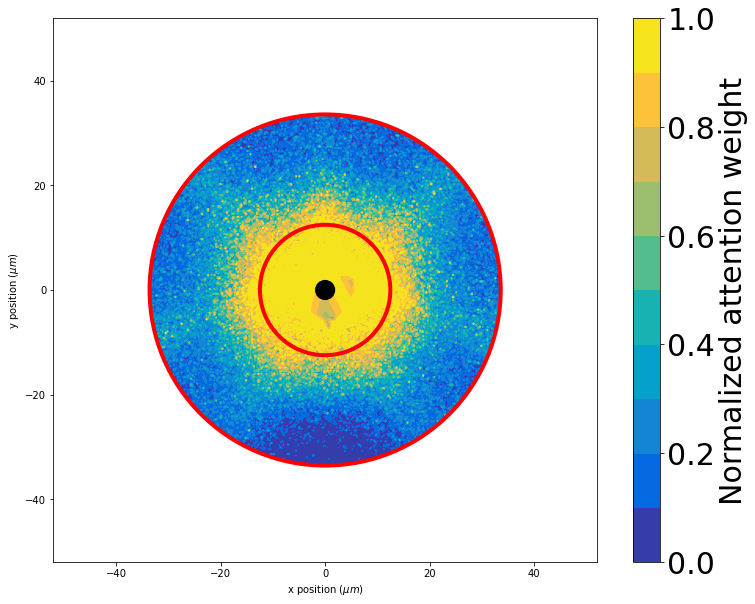

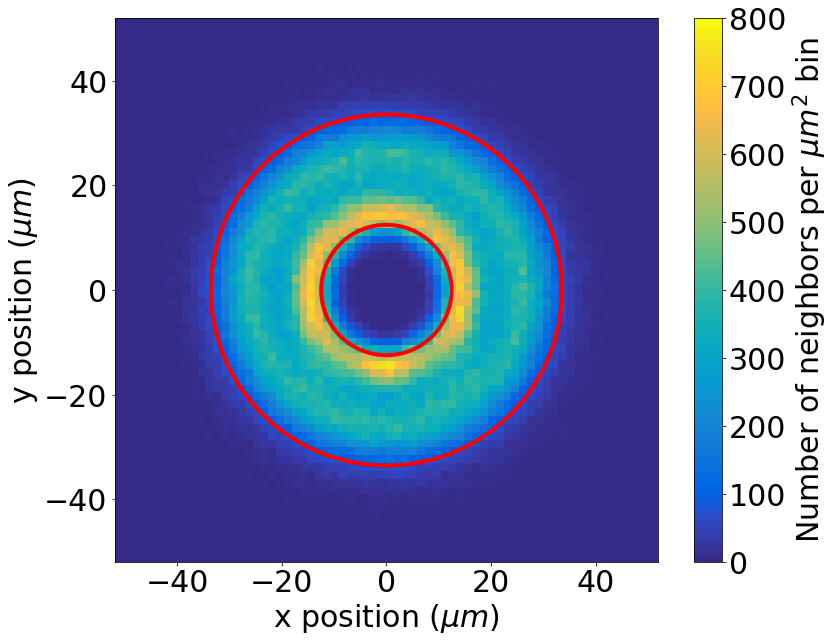

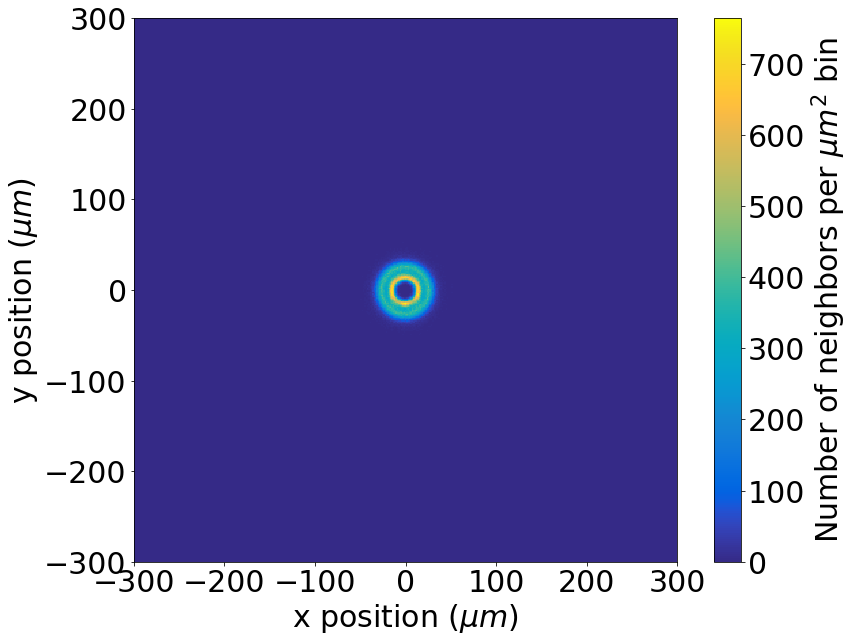

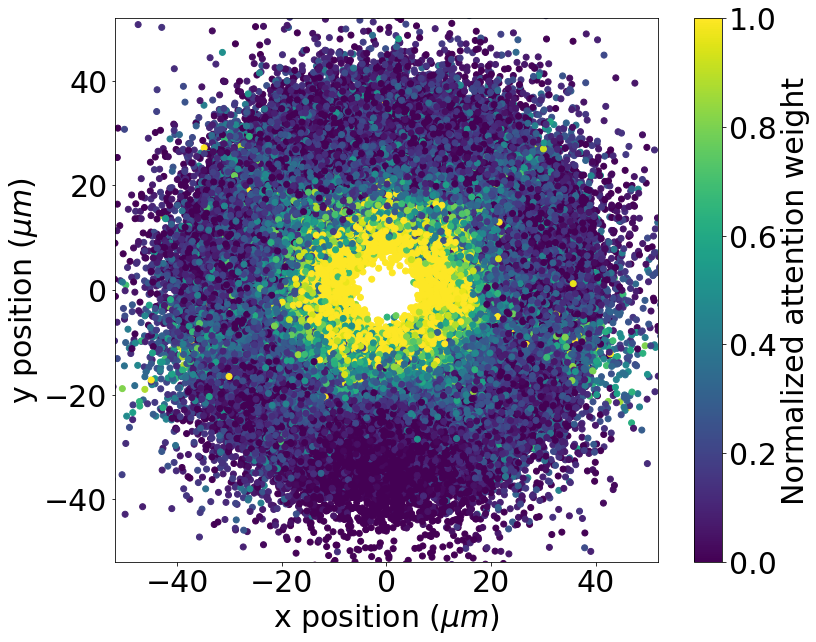

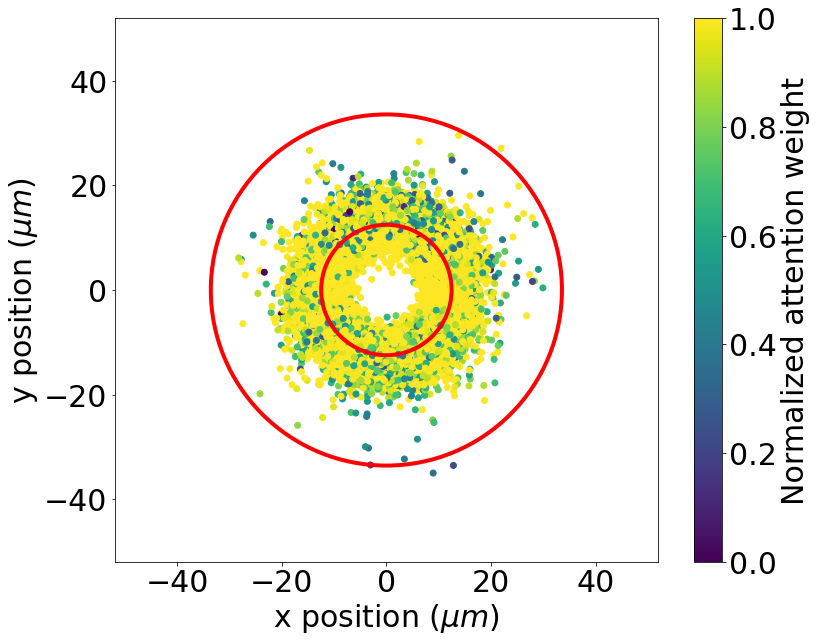

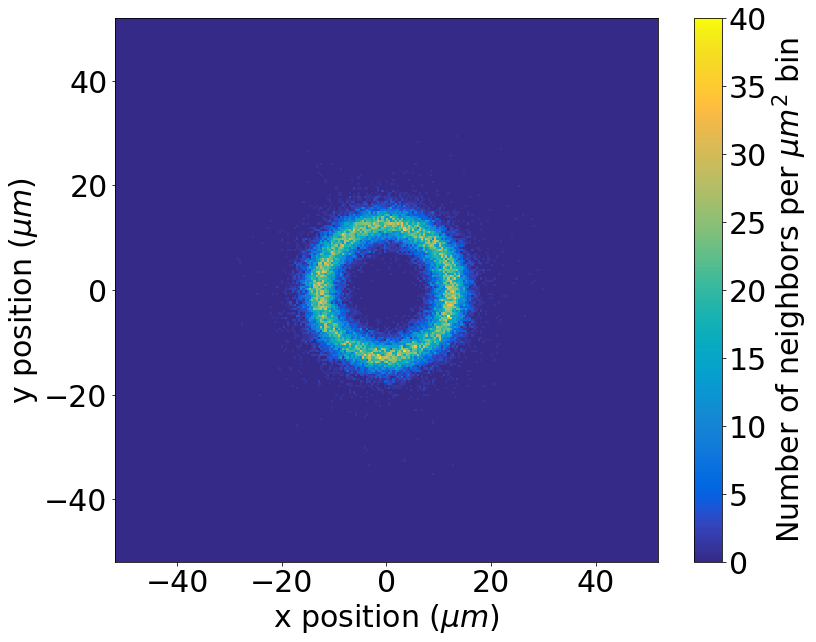

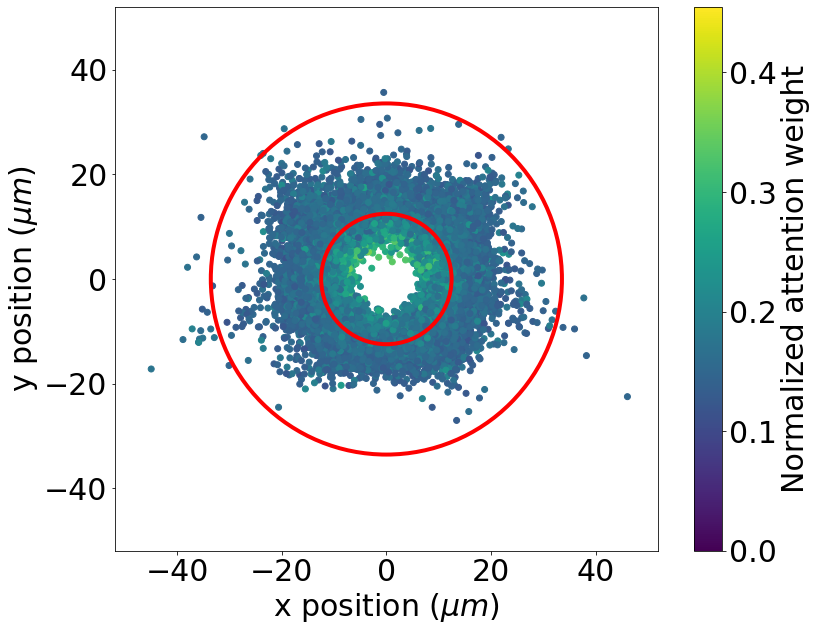

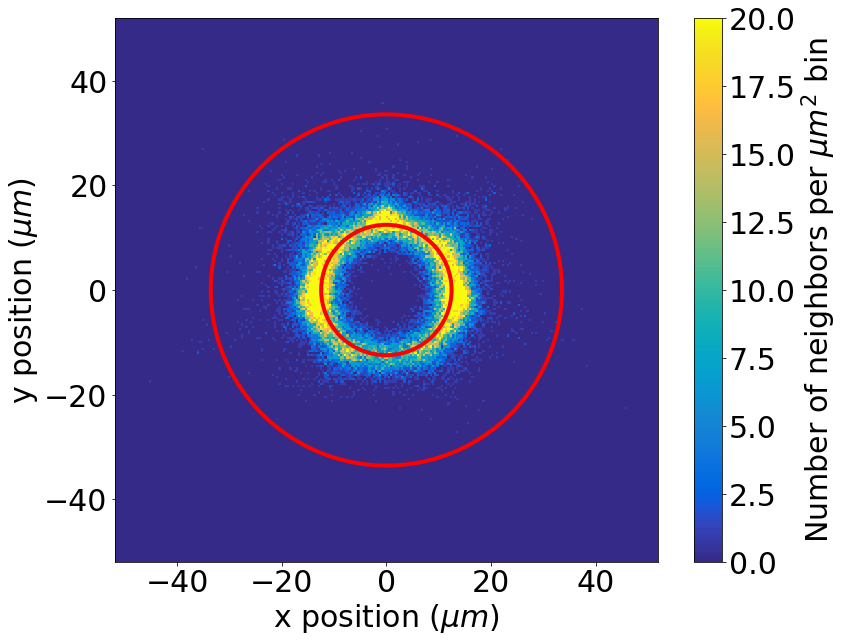

Done


In [1]:
import numpy as np
import os
#import pickle
import pickle5 as pickle
import math
import matplotlib.pyplot as plt
from trajectorytools.geometry import angle_between_vectors
from fishandra.plot.attention import (attention_nb_focal_speed_figure_data, plot_fig)
from scipy.interpolate import griddata
from matplotlib.patches import Ellipse, Circle
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density
import matplotlib.tri as tri
from matplotlib.ticker import LogFormatter 

fontsize = 30
ls = 30

# MDCK -> 30
#new_ext = 72.96018855117366

# HUVEC -> 30
#new_ext = 217.8677815138454

# Edge: 
new_ext = 51.98520213367006

# mda single:
#new_ext = 78.03465231018083

#huvec single:
#new_ext = 129.9104761217153

# mdck single:
#new_ext = 44.83335175019232

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

# ---------------------------------------------------------------------------------------- #

def plot_and_save_attention_map(pic_folder_name, pic_folder_name_pdf, pix_in_um, input_data, results_pkl, ext, steps, parula_map):

    # Get arena radius: 
    with open(results_pkl, 'rb') as pickle_file:
        d_pkl = pickle.load(pickle_file)
    arena_radius = d_pkl['arena_radius'][0]
    
    # Convert sizes to microns: 
    pix_size = arena_radius
    total_size_um = pix_size * pix_in_um

    # Set limit on plotting (if desired): 
    min_no = 50000
    #max_no = 50000
    max_no = min_no + 50000
    #max_no = 50100

    # Load trajectory/attention data from otuput_results file: 
    g = np.load(input_data, allow_pickle=True)
    gd = g.item()
    
    #print(gd)

    x = []
    y = []
    y_sign = []
    z = []
    angle = []

    # Loop over focal agents:
    for elem_no in range(min_no, max_no+1):
    #for elem_no in range(len(gd['attention_layer'])):

        # Get attention weight values for agent's neighbors: 
        flux = gd['attention_layer'][elem_no]
        # Normalize attention: 
        normflux = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))
        # Convert to weird color scale: 
        fluxcolor = (normflux, 1.-normflux, normflux)

        # Loop over number of neighbors; store x/y data: 
        for i in range(len(gd['attention_layer'][0])):
            x.append(gd['social'][elem_no][i+1][0]*total_size_um)    
            y.append(gd['social'][elem_no][i+1][1]*total_size_um)
        y_sign.append(gd['target'][elem_no][0])
        angle.append(np.degrees(angle_between_vectors(np.array([0,1]), gd['target'][elem_no][0:2])))
                    
        # Store colors: 
        for j in range(len(fluxcolor[0])):
            z.append(fluxcolor[0][j])

    # Find closest distance: 
    distance = []
    for i in range(len(x)):
        distance.append(math.sqrt( ((x[i])**2)+((y[i])**2) ))
        
    Q1 = np.quantile(distance,0.05)
    Q3 = np.quantile(distance,0.95)        
            
    # Create the figure: 
    plt.figure(figsize=(13,10))
    ax = plt.gca(aspect='equal')
    plt.rcParams.update({'font.size': fontsize})
    
    x.append(-1.0*ext*1.5)
    y.append(-1.0*ext*1.5)
    z.append(0.0)
    
    x.append(1.0*ext*1.5)
    y.append(-1.0*ext*1.5)
    z.append(0.0)
    
    x.append(-1.0*ext*1.5)
    y.append(1.0*ext*1.5)
    z.append(0.0)
    
    x.append(1.0*ext*1.5)
    y.append(1.0*ext*1.5)
    z.append(0.0)
        
    # Add minimal circle (showing closest data point):
    w = min(distance)
    h = w

    # Create grid values first.
    ngridx = 10*ext
    ngridy=10*ext
    xi = np.linspace(min(x), max(x), ngridx)
    yi = np.linspace(min(y), max(y), ngridy)

    # Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)

    # Note that scipy.interpolate provides means to interpolate data on a grid
    # as well. The following would be an alternative to the four lines above:
    #from scipy.interpolate import griddata
    #zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

    #plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
    cntr1 = plt.contourf(xi, yi, zi, levels=10, cmap=parula_map)
    
    ellipse = Ellipse(xy=(0.00, 0.00), width=w, height=h, edgecolor='k', fc='k', lw=2)
    ax.add_patch(ellipse)
    
    #ax.set_xlim(-1*Q3, Q3)
    #ax.set_ylim(-1*Q3, Q3)
    
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)
    
    cbar = plt.colorbar(label='Normalized attention weight')
    cbar.ax.tick_params(labelsize=ls) 
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    plt.rcParams.update({'font.size': fontsize})
    
    circ = Circle((0.0, 0.0), Q3, transform=ax.transData)
    for coll in cntr1.collections:
        coll.set_clip_path(circ)
    lw = 4
    circle1 = plt.Circle((0, 0), Q1, facecolor='None', edgecolor='r', linewidth=lw)
    circle3 = plt.Circle((0, 0), Q3, facecolor='None', edgecolor='r', linewidth=lw)
    ax.add_patch(circle1)
    ax.add_patch(circle3)
    
    str_ext = str(ext)
    img_name = pic_folder_name + 'emph_attention_norm_' + str_ext + '.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'emph_attention_norm_' + str_ext + '.pdf'
    plt.savefig(img_name_pdf)
    
    plt.show()

    return x, y, y_sign, z, angle, Q1, Q3, w, h #, turn, prediction

def plot_and_save_point_distribution_reduced(pic_folder_name, pic_folder_name_pdf, x, y, ext, Q1, Q3, w, h):
    fig = plt.figure(figsize=(13,10))
    ax = plt.gca(aspect='equal')
    #ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    #density = ax.scatter_density(x, y)
    
    h = plt.hist2d(x, y,
           bins = 2*200, 
           cmap =parula_map) #           norm = colors.LogNorm(), 
    cb = fig.colorbar(h[3], ax=ax, label='Number of neighbors per $\u03BC m^2$ bin')
    
    #minorticks = h.norm(np.arange(1, 10, 2))
    #cb.ax.xaxis.set_ticks(minorticks, minor=True)
    #formatter = LogFormatter(10, labelOnlyBase=False) 
    #cb = plt.colorbar(ticks=[1,5,10,20,50], format=formatter)
    
    ext = Q3
    
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)
    #ax.set_xlim(-1*Q3, Q3)
    #ax.set_ylim(-1*Q3, Q3)
    
    #plt.clim(0,50) 
    plt.clim(0,800) 
    
    #ellipse = Ellipse(xy=(0.00, 0.00), width=w, height=h, edgecolor='k', fc='k', lw=2)
    #ax.add_patch(ellipse)
    lw = 4
    circle1 = plt.Circle((0, 0), Q1, facecolor='None', edgecolor='r', linewidth=lw)
    circle3 = plt.Circle((0, 0), Q3, facecolor='None', edgecolor='r', linewidth=lw)
    ax.add_patch(circle1)
    ax.add_patch(circle3)
    
    ax.set_aspect('equal')
    #fig.colorbar(density, label='Number of points per pixel')
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    str_ext = str(ext)
    img_name = pic_folder_name + 'reduced_point_map_' + str_ext + '.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'reduced_point_map_' + str_ext + '.pdf'
    plt.savefig(img_name_pdf)
                
    plt.show()

def plot_and_save_point_distribution_full(pic_folder_name, pic_folder_name_pdf, x, y):
    fig = plt.figure(figsize=(13,10))
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    #density = ax.scatter_density(x, y)
    
    h = plt.hist2d(x, y,
           bins = 2*200, 
           cmap =parula_map) #           norm = colors.LogNorm(), 
    cb = fig.colorbar(h[3], ax=ax, label='Number of neighbors per $\u03BC m^2$ bin')
    
    #ax.set_xlim(-500, 500)
    #ax.set_ylim(-500, 500)
    ax.set_aspect('equal')
    #fig.colorbar(density, label='Number of points per pixel')
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')

    img_name = pic_folder_name + 'full_point_map.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'full_point_map.pdf'
    plt.savefig(img_name_pdf)
    
    plt.show()
    
def plot_and_save_actual_scatter(pic_folder_name, pic_folder_name_pdf, x, y, ext, z):
    plt.figure(figsize=(13, 10))
    ax = plt.gca(aspect='equal')
    plt.scatter(x,y, c=z)
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)

    #fac = 6000
    #w = 0.005*fac
    #h = 0.007*fac
    #ellipse = Ellipse(xy=(0.00, 0.00), width=w, height=h, edgecolor='k', fc='None', lw=2)
    #ax.add_patch(ellipse)
    
    plt.colorbar(label='Normalized attention weight')
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    
    img_name = pic_folder_name + 'actual_scatter_map.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'actual_scatter_map.pdf'
    plt.savefig(img_name_pdf)

    plt.show()
    
def plot_and_save_closest_actual(pic_folder_name, pic_folder_name_pdf, pix_in_um, input_data, results_pkl, Q1, ext, steps, parula_map):

    # Get arena radius: 
    with open(results_pkl, 'rb') as pickle_file:
        d_pkl = pickle.load(pickle_file)
    arena_radius = d_pkl['arena_radius'][0]
 
    # Convert sizes to microns: 
    pix_size = arena_radius
    total_size_um = pix_size * pix_in_um

    # Set limit on plotting (if desired): 
    min_no = 50000
    max_no = min_no + 50000

    # Load trajectory/attention data from otuput_results file: 
    g = np.load(input_data, allow_pickle=True)
    gd = g.item()

    x = []
    y = []
    z = []

    # Loop over focal agents:
    for elem_no in range(min_no, max_no+1):
    #for elem_no in range(len(gd['attention_layer'])):

        # Get attention weight values for agent's neighbors: 
        flux = gd['attention_layer'][elem_no]
        # Normalize attention: 
        normflux = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))
        # Convert to weird color scale: 
        fluxcolor = (normflux, 1.-normflux, normflux)

        # Loop over number of neighbors; store x/y data: 
        x_temp = []
        y_temp = []
        for i in range(len(gd['attention_layer'][0])):
            x_temp.append(gd['social'][elem_no][i+1][0]*total_size_um)    
            y_temp.append(gd['social'][elem_no][i+1][1]*total_size_um)
            
        # Find closest distance: 
        distance = []
        for i in range(len(x_temp)):
            distance.append(math.sqrt( ((x_temp[i])**2)+((y_temp[i])**2) ))
            
        min_index = distance.index(min(distance))
            
        # Get index and store x, y, z
        x.append(x_temp[min_index])   
        y.append(y_temp[min_index])
        z.append(fluxcolor[0][min_index])
        
    x.append(-2.5*ext)
    y.append(-2.5*ext)
    z.append(0.0)
    
    x.append(2.5*ext)
    y.append(-2.5*ext)
    z.append(0.0)
    
    x.append(-2.5*ext)
    y.append(2.5*ext)
    z.append(0.0)
    
    x.append(2.5*ext)
    y.append(2.5*ext)
    z.append(0.0)

    plt.figure(figsize=(13, 10))
    ax = plt.gca(aspect='equal')
    plt.scatter(x,y, c=z)
    
    #ax.set_xlim(-1*ext, ext)
    #ax.set_ylim(-1*ext, ext)
    
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)
    
    cbar = plt.colorbar(label='Normalized attention weight')
    cbar.ax.tick_params(labelsize=ls)
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    
    lw = 4
    circle1 = plt.Circle((0, 0), Q1, facecolor='None', edgecolor='r', linewidth=lw)
    circle3 = plt.Circle((0, 0), ext, facecolor='None', edgecolor='r', linewidth=lw)
    ax.add_patch(circle1)
    ax.add_patch(circle3)
    
    img_name = pic_folder_name + 'closest_actual_scatter_map.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'closest_actual_scatter_map.pdf'
    plt.savefig(img_name_pdf)
    plt.show()
    
    fig = plt.figure(figsize=(13,10))
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    #density = ax.scatter_density(x, y)
    
    h = plt.hist2d(x, y,
           bins = 2*200, 
           cmap =parula_map) #           norm = colors.LogNorm(), 
    cb = fig.colorbar(h[3], ax=ax, label='Number of neighbors per $\u03BC m^2$ bin')
    cb.ax.tick_params(labelsize=ls)
    
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)
    ax.set_aspect('equal')
    #fig.colorbar(density, label='Number of points per pixel')
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    str_ext = str(ext)
    img_name = pic_folder_name + 'closest_reduced_point_map_' + str_ext + '.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'closest_reduced_point_map_' + str_ext + '.pdf'
    plt.savefig(img_name_pdf)
    plt.show()
    
def plot_and_save_highest_weight_actual(pic_folder_name, pic_folder_name_pdf, pix_in_um, input_data, results_pkl, Q1, ext, steps, parula_map):

    # Get arena radius: 
    with open(results_pkl, 'rb') as pickle_file:
        d_pkl = pickle.load(pickle_file)
    arena_radius = d_pkl['arena_radius'][0]
 
    # Convert sizes to microns: 
    pix_size = arena_radius
    total_size_um = pix_size * pix_in_um

    # Set limit on plotting (if desired): 
    min_no = 50000
    max_no = min_no + 50000

    # Load trajectory/attention data from otuput_results file: 
    g = np.load(input_data, allow_pickle=True)
    gd = g.item()

    x = []
    y = []
    z = []

    # Loop over focal agents:
    for elem_no in range(min_no, max_no+1):
    #for elem_no in range(len(gd['attention_layer'])):

        # Get attention weight values for agent's neighbors: 
        flux = gd['attention_layer'][elem_no]
        # Normalize attention: 
        normflux = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))
        # Convert to weird color scale: 
        fluxcolor = (normflux, 1.-normflux, normflux)

        # Loop over number of neighbors; store x/y data: 
        x_temp = []
        y_temp = []
        for i in range(len(gd['attention_layer'][0])):
            x_temp.append(gd['social'][elem_no][i+1][0]*total_size_um)    
            y_temp.append(gd['social'][elem_no][i+1][1]*total_size_um)
                                  
        maximum = np.max(fluxcolor[0][:])
        max_index = np.where(fluxcolor[0][:] == maximum)[0][0]
            
        # Get index and store x, y, z
        x.append(x_temp[max_index])   
        y.append(y_temp[max_index])
        z.append(flux[max_index])

    x.append(-2.5*ext)
    y.append(-2.5*ext)
    z.append(0.0)
    
    x.append(2.5*ext)
    y.append(-2.5*ext)
    z.append(0.0)
    
    x.append(-2.5*ext)
    y.append(2.5*ext)
    z.append(0.0)
    
    x.append(2.5*ext)
    y.append(2.5*ext)
    z.append(0.0)

    plt.figure(figsize=(13, 10))
    ax = plt.gca(aspect='equal')
    plt.scatter(x,y, c=z)
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)
    cbar = plt.colorbar(label='Normalized attention weight')
    cbar.ax.tick_params(labelsize=ls)
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    lw = 4
    circle1 = plt.Circle((0, 0), Q1, facecolor='None', edgecolor='r', linewidth=lw)
    circle3 = plt.Circle((0, 0), ext, facecolor='None', edgecolor='r', linewidth=lw)
    ax.add_patch(circle1)
    ax.add_patch(circle3)
    
    img_name = pic_folder_name + 'highest_weight_actual_scatter_map.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'highest_weight_actual_scatter_map.pdf'
    plt.savefig(img_name_pdf)
    plt.show()
    
    fig = plt.figure(figsize=(13,10))
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    #density = ax.scatter_density(x, y)
    
    h = plt.hist2d(x, y,
           bins = 2*200, 
           cmap =parula_map) #           norm = colors.LogNorm(), 
    cb = fig.colorbar(h[3], ax=ax, label='Number of neighbors per $\u03BC m^2$ bin')
    cb.ax.tick_params(labelsize=ls)
    
    plt.clim(0,20) 
    
    ax.set_xlim(-1*new_ext, new_ext)
    ax.set_ylim(-1*new_ext, new_ext)
    
    #ax.set_xlim(-1*ext, ext)
    #ax.set_ylim(-1*ext, ext)
    
    ax.set_aspect('equal')
    #fig.colorbar(density, label='Number of points per pixel')
    plt.xlabel('x position ($\u03BC m$)')
    plt.ylabel('y position ($\u03BC m$)')
    circle1 = plt.Circle((0, 0), Q1, facecolor='None', edgecolor='r', linewidth=lw)
    circle3 = plt.Circle((0, 0), ext, facecolor='None', edgecolor='r', linewidth=lw)
    ax.add_patch(circle1)
    ax.add_patch(circle3)
    str_ext = str(ext)
    img_name = pic_folder_name + 'highest_weight_reduced_point_map_' + str_ext + '.jpg'
    plt.savefig(img_name)
    img_name_pdf = pic_folder_name_pdf + 'highest_weight_reduced_point_map_' + str_ext + '.pdf'
    plt.savefig(img_name_pdf)
    plt.show()


# --------------------------------------------------------------------------------------------- # 
    
    
list_subfolders_with_paths = [f.path for f in os.scandir('./cluster_out_7') if f.is_dir()]
list_subfolders_with_paths.sort()

#for i in range(len(list_subfolders_with_paths)):
for i in range(0,1):
#for i in range(6, len(list_subfolders_with_paths)):


    # Get the subfolders: 
    folder_name = list_subfolders_with_paths[i] #[7:]
    print(folder_name)
    
    # Create the folder for storing pics: 
    pic_folder_name = folder_name + '/pics_jpg/'
    if not os.path.exists(pic_folder_name):
        os.makedirs(pic_folder_name)
    pic_folder_name_pdf = folder_name + '/pics_pdf/'
    if not os.path.exists(pic_folder_name_pdf):
        os.makedirs(pic_folder_name_pdf)

    # Get the output file:
    input_data = folder_name + '/output_results.npy'
    
    # Get the results file: 
    results_pkl = folder_name + '/results.pkl'
    
    # Get conversion: 
    if('HUVEC' in pic_folder_name or 'Kevin' in pic_folder_name):
        pix_in_um = 1.825 # HUVEC data, 7.3/4
    if('MDCK' in pic_folder_name or 'MDA' in pic_folder_name):
        pix_in_um = 0.73 # MDCK/MDA data, 7.3/10
    
    # Create plotting grid:
    #if('NumNeighbors_10' in pic_folder_name):
    #    ext = 100
    #else:
    #    ext = 200
        
    ext = 200
    steps = 400j
    
    x, y, y_sign, z, angle, Q1, Q3, w, h = plot_and_save_attention_map(pic_folder_name, pic_folder_name_pdf, pix_in_um, input_data, results_pkl, ext, steps, parula_map)
    plot_and_save_point_distribution_reduced(pic_folder_name, pic_folder_name_pdf, x, y, ext, Q1, Q3, w, h)
    plot_and_save_point_distribution_full(pic_folder_name, pic_folder_name_pdf, x, y)
    plot_and_save_actual_scatter(pic_folder_name, pic_folder_name_pdf, x, y, Q3, z)
    del x
    del y
    del z
    del y_sign
    del angle
    plot_and_save_closest_actual(pic_folder_name, pic_folder_name_pdf, pix_in_um, input_data, results_pkl, Q1, Q3, steps, parula_map)
    plot_and_save_highest_weight_actual(pic_folder_name, pic_folder_name_pdf, pix_in_um, input_data, results_pkl, Q1, Q3, steps, parula_map)
    print('Done')



In [11]:
list_subfolders_with_paths = [f.path for f in os.scandir('./cluster_out_kevin') if f.is_dir()]
list_subfolders_with_paths.sort()

which_num = 3

for i in range(which_num, which_num+1):
    print(list_subfolders_with_paths[i])
    
    #command = 'python3 ./plot_num_nb_julie.py ' + list_subfolders_with_paths[i]
    #os.system(command)
    
    

./cluster_out_kevin/Kevin_After_NumNeighbors_5_FutureSteps_2_NumEpochs_1000_RemoveOuter_def


In [ ]:
print(list_subfolders_with_paths)

In [ ]:
import csv


list_subfolders_with_paths = [f.path for f in os.scandir('./save_auto') if f.is_dir()]
list_subfolders_with_paths.sort()

acc = []
large = []
top = []

for i in range(len(list_subfolders_with_paths)):
#for i in range(1):
    
    print(list_subfolders_with_paths[i])
    
    filename = list_subfolders_with_paths[i] + "/results_test.log"
    
    f = open(filename, "r")

    line1 = f.readline()
    line2 = f.readline()
    
    lin = line2.split()
    acc.append(float(lin[2]))
    large.append(float(lin[6][:-1]))
    top.append(float(lin[-1]))

print(acc)
print(large)
print(top)

with open('./test.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(list_subfolders_with_paths, acc, large, top))




In [ ]:
print(os.stat('./cluster_out/output_results.npy').st_size)
g = np.load('./cluster_out/output_results.npy', allow_pickle=True)